<a href="https://colab.research.google.com/github/reue-lly/Predictive-Analytics-using-Machine-Learning/blob/main/Activity-1/Pornobe_Predictive_Analysis_Hands_on_Activity_1_1_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Activity 1.1 : Introduction to Machine Learning**

Objective(s):

This activity aims to introduce how to use the different toolsets  in machine learning.

Intended Learning Outcomes (ILOs):
* Demonstrate how to use different toolsets in machine learning.
* Demonstrate how to import, manipulate and analyze data using pandas and numpy.
* Demonstrate how to visualize data in graphs using matplotlib and seaborn


Resources:
* Jupyter Notebook
* Iris_Data.csv


## Procedure:

The iris data set will be used for this activity. It is a well-known data set containing iris species and sepal and petal measurements.

Import the libraries and the dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#import the libraries
import pandas as pd
import numpy as np

# import the dataset
data = pd.read_csv('/content/drive/MyDrive/HOA 1.1 - Predictive Analysis/Iris_Data.csv')
#check the content of the dataframe
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


Determine the following:
* The number of data points (rows).
* The column names.
* The data types for each column.

In [ ]:
#the number of datapoints
print(data.shape[0])

#the column names
print(data.columns.tolist())

#the data types for each column
print(data.dtypes)

150
['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']
sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object


Examine the species names and note that they all begin with 'Iris-'. Remove this portion of the name so the species name is shorter.

In [ ]:
#remove the 'Iris-' portion of the name
data['species'] = data.species.str.replace('Iris-', '')
data.head()


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


Determine the following:
* The number of each species present.
* The mean, median, and quantiles and ranges (max-min) for each petal and sepal measurement.

In [ ]:
#the number of each species present
data.species.value_counts()

# the mean, median and quartiles and ranges
stats_df = data.describe()
stats_df.loc['range'] = stats_df.loc['max'] - stats_df.loc['min']

out_fields = ['mean','25%','50%','75%', 'range']
stats_df = stats_df.loc[out_fields]
stats_df.rename({'50%': 'median'}, inplace=True)
stats_df



,sepal_length,sepal_width,petal_length,petal_width
mean,5.843333,3.054,3.758667,1.198667
25%,5.100000,2.800,1.600000,0.300000
median,5.800000,3.000,4.350000,1.300000
75%,6.400000,3.300,5.100000,1.800000
range,3.600000,2.400,5.900000,2.400000


## Calculate the following for each species in a separate dataframe:
* The mean of each measurement (sepal_length, sepal_width, petal_length, and petal_width).
* The median of each of these measurements.

In [ ]:
# The mean calculation
data.groupby('species').mean()



,sepal_length,sepal_width,petal_length,petal_width
species,,,,
setosa,5.006,3.418,1.464,0.244
versicolor,5.936,2.770,4.260,1.326
virginica,6.588,2.974,5.552,2.026


In [ ]:
# The median calculation
data.groupby('species').median()

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
setosa,5.0,3.4,1.50,0.2
versicolor,5.9,2.8,4.35,1.3
virginica,6.5,3.0,5.55,2.0


In [ ]:
from pprint import pprint

agg_dict = {field: ['mean', 'median'] for field in data.columns if field != 'species'}
agg_dict['petal_length'] = 'max'
pprint(agg_dict)
data.groupby('species').agg(agg_dict)

{'petal_length': 'max',
 'petal_width': ['mean', 'median'],
 'sepal_length': ['mean', 'median'],
 'sepal_width': ['mean', 'median']}


sepal_length        sepal_width        petal_length petal_width  \
                   mean median        mean median          max        mean   
species                                                                      
setosa            5.006    5.0       3.418    3.4          1.9       0.244   
versicolor        5.936    5.9       2.770    2.8          5.1       1.326   
virginica         6.588    6.5       2.974    3.0          6.9       2.026   

                   
           median  
species            
setosa        0.2  
versicolor    1.3  
virginica     2.0

Make a scatter plot of `sepal_length` vs `sepal_width` using Matplotlib. Label the axes and give the plot a title.

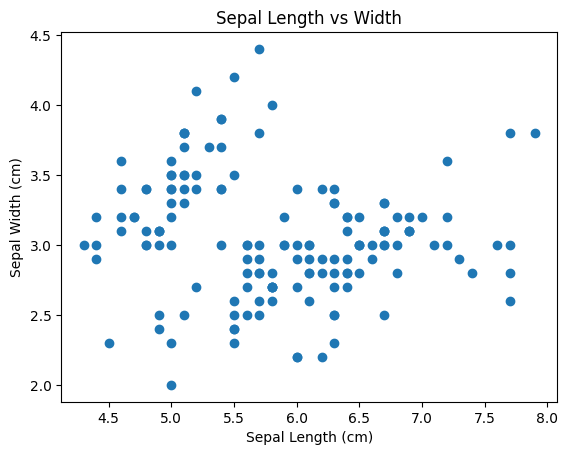

In [ ]:
#Scatter plot of sepal_length versus sepal_width using Matplotlib

import matplotlib.pyplot as plt
%matplotlib inline
# A simple scatter plot with Matplotlib
ax = plt.axes()

ax.scatter(data.sepal_length, data.sepal_width)

# Label the axes
ax.set(xlabel='Sepal Length (cm)',
       ylabel='Sepal Width (cm)',
       title='Sepal Length vs Width');


Interpret the result of the scatter plot.

I observed that there is 2 clusters or tendency of the proportions of the flowers sepal width and length. The first cluster tends to reside in the 3 cm - 4 cm sepal width and 4.5 cm to 5.5 cm sepal length. The second cluster is larger and it tends between 2.2 cm to 3.2 cm width and 5.5 cm to 7.0 cm length. I suppose these tendencies are related to the flowers species.

Make a histogram of any one of the four features. Label axes and title it as appropriate. What is the function of the histogram ?

The function of a histogram is to find the distribution of data within the dataset. Using a histogram, you can see where the pattern of data by looking at the frequency of the values.


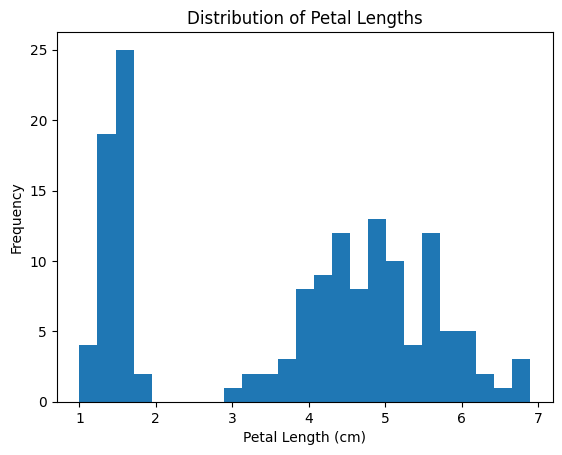

In [ ]:
#histogram
ax = plt.axes()
ax.hist(data.petal_length, bins=25);

ax.set(xlabel='Petal Length (cm)',
       ylabel='Frequency',
       title='Distribution of Petal Lengths');

Make a boxplot of each petal and sepal measurement. What is the function of the boxplot?

A boxplot is used to illustrate the spread and skewness of data. Boxplot displays the median, first quartile, third quartile, minimum, and maximum. Boxplots also helps in identifying the pattern and outliers in the dataset.

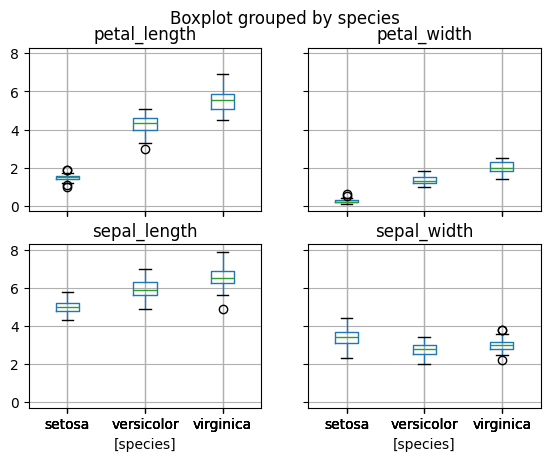

In [ ]:
#boxplot
data.boxplot(by='species');

Make a single boxplot where the features are separated in the x-axis and species are colored with different hues.

In [ ]:
#single boxplot
plot_data = (data
             .set_index('species')
             .stack()
             .to_frame()
             .reset_index()
             .rename(columns={0:'size', 'level_1':'measurement'})
            )

plot_data.head()

,species,measurement,size
0,setosa,sepal_length,5.1
1,setosa,sepal_width,3.5
2,setosa,petal_length,1.4
3,setosa,petal_width,0.2
4,setosa,sepal_length,4.9


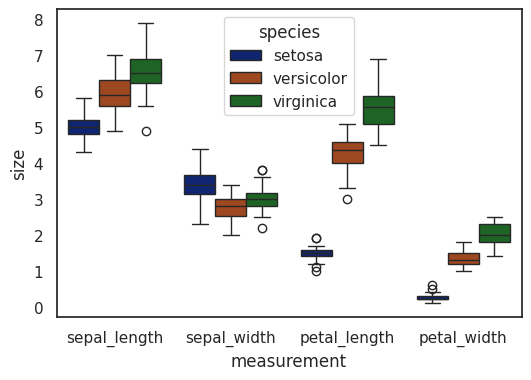

In [ ]:
import seaborn as sns
sns.set_style('white')
sns.set_context('notebook')
sns.set_palette('dark')

f = plt.figure(figsize=(6,4))
sns.boxplot(x='measurement', y='size',
            hue='species', data=plot_data);

Make a pairplot with Seaborn to examine the correlation between each of the measurements.

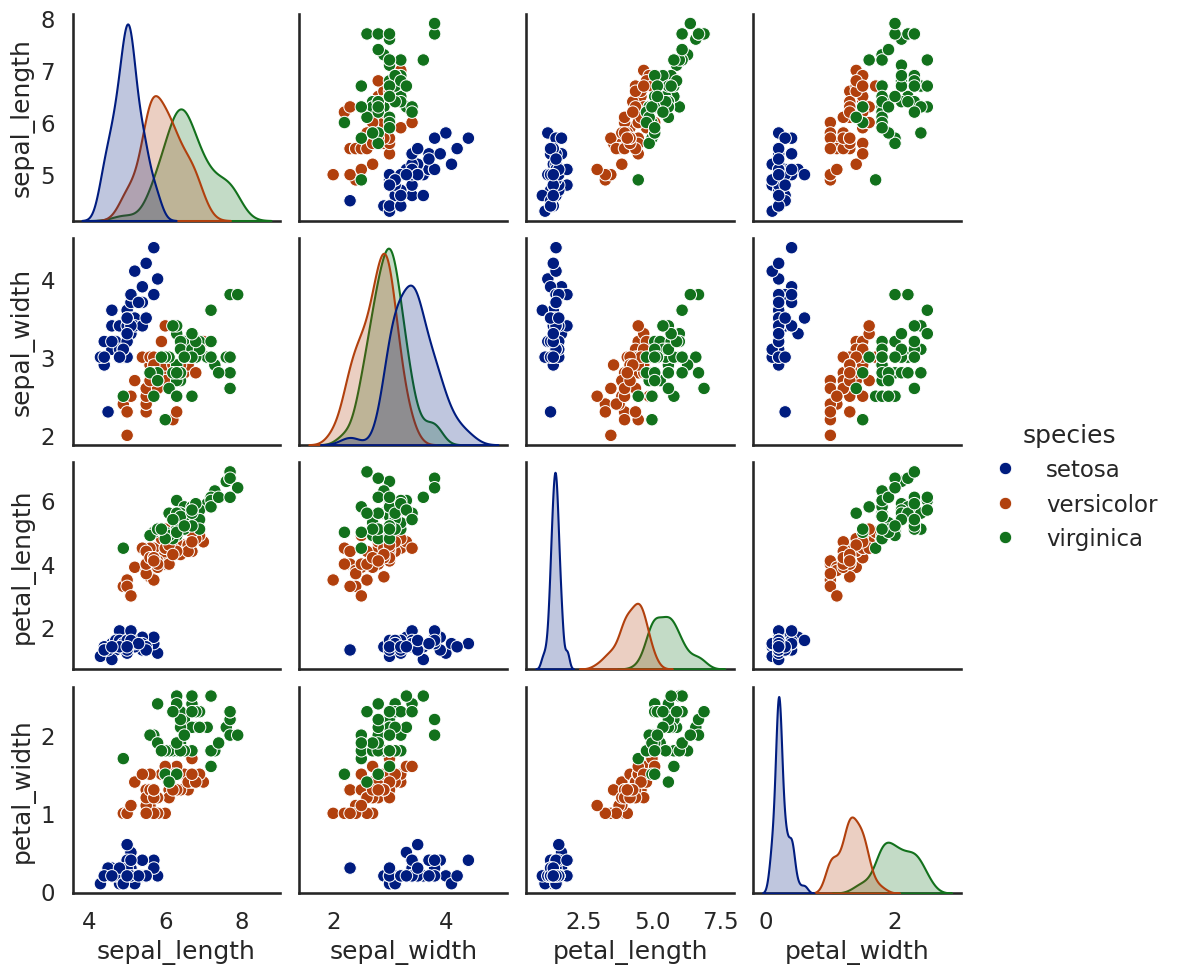

In [ ]:
#pair plot
sns.set_context('talk')
sns.pairplot(data, hue='species');



Interpret the result of correlation using the pairplot

Based on the pairplot, Versicolor and Virginica is similar to one another because they often cluster together with slight variations. On the other hand, Setosa is often clustered away from Versicolor and Viginica indicating that it is has unique proportions compared to Versicolor and Virginica.



---



# **Supplementary Activity:**

* Choose your own dataset
* Import the dataset
* Determine the number of datapoints, columns and data types
* Remove unneccesary columns
* Do data cleaning such as removing empty values.
* Perform descriptive statistics such as mean, median and mode
* Compare and analyze your data using data visualization

## Import Dataset

In [ ]:
# Import dataset

df = pd.read_csv('/content/drive/MyDrive/HOA 1.1 - Predictive Analysis/penguins_size.csv')
df.head(5)

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE




---



## Data Cleaning

In [ ]:
#check for null values
df.isnull().sum()

,0
species,0
island,0
culmen_length_mm,2
culmen_depth_mm,2
flipper_length_mm,2
body_mass_g,2
sex,10


In [ ]:
#drop all the null values
df.dropna(inplace = True)

In [ ]:
df.isnull().sum()

,0
species,0
island,0
culmen_length_mm,0
culmen_depth_mm,0
flipper_length_mm,0
body_mass_g,0
sex,0


In [ ]:
# drop the island column
df.drop('island', axis=1, inplace=True)

In [ ]:
# drop the sex column
df.drop('sex', axis=1, inplace=True)

In [ ]:
df.head(5)

,species,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
0,Adelie,39.1,18.7,181.0,3750.0
1,Adelie,39.5,17.4,186.0,3800.0
2,Adelie,40.3,18.0,195.0,3250.0
4,Adelie,36.7,19.3,193.0,3450.0
5,Adelie,39.3,20.6,190.0,3650.0




---



## Determine the number of datapoints, columns and data types

In [ ]:
#the number of datapoints
print(df.shape[0])

#the column names
print(df.columns.tolist())

#the data types for each column
print(df.dtypes)

334
['species', 'culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g']
species               object
culmen_length_mm     float64
culmen_depth_mm      float64
flipper_length_mm    float64
body_mass_g          float64
dtype: object




---



## Perform descriptive statistics such as mean, median and mode

In [ ]:
#the number of each penguin species present
df.species.value_counts()

,count
species,
Adelie,146
Gentoo,120
Chinstrap,68


In [ ]:
# the mean, median and quartiles and ranges
dfStats = df.describe()         #function to see the descriptive statistics of the dataset
dfStats.loc['range'] = dfStats.loc['max'] - dfStats.loc['min']  #create a new column calculating the range

dfStats

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,334.000000,334.000000,334.000000,334.000000
mean,43.994311,17.160479,201.014970,4209.056886
std,5.460521,1.967909,14.022175,804.836129
min,32.100000,13.100000,172.000000,2700.000000
25%,39.500000,15.600000,190.000000,3550.000000
50%,44.500000,17.300000,197.000000,4050.000000
75%,48.575000,18.700000,213.000000,4793.750000
max,59.600000,21.500000,231.000000,6300.000000
range,27.500000,8.400000,59.000000,3600.000000


### mean, 25%, median, 75%, range

In [ ]:
# Select only the 'mean','25%','median','75%', 'range
outputFields = ['mean','25%','50%','75%', 'range']
dfStats = dfStats.loc[outputFields]
dfStats.rename({'50%':'median'}, inplace = True) # rename the 50% to median
dfStats

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
mean,43.994311,17.160479,201.01497,4209.056886
25%,39.500000,15.600000,190.00000,3550.000000
median,44.500000,17.300000,197.00000,4050.000000
75%,48.575000,18.700000,213.00000,4793.750000
range,27.500000,8.400000,59.00000,3600.000000


### Mean

In [ ]:
df.groupby('species').mean()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
species,,,,
Adelie,38.823973,18.347260,190.102740,3706.164384
Chinstrap,48.833824,18.420588,195.823529,3733.088235
Gentoo,47.542500,15.002500,217.233333,5090.625000


### Median

In [ ]:
df.groupby('species').median()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
species,,,,
Adelie,38.85,18.40,190.0,3700.0
Chinstrap,49.55,18.45,196.0,3700.0
Gentoo,47.35,15.00,216.0,5050.0




---



## Compare and analyze your data using data visualization

In [ ]:
from pprint import pprint      #import pretty print to create a dictionary

#select all fields except the species as key and its values are its mean and median
aggDict = {field: ['mean', 'median'] for field in df.columns if field != 'species'}
pprint(aggDict)
df.groupby('species').agg(aggDict)

{'body_mass_g': ['mean', 'median'],
 'culmen_depth_mm': ['mean', 'median'],
 'culmen_length_mm': ['mean', 'median'],
 'flipper_length_mm': ['mean', 'median']}


culmen_length_mm        culmen_depth_mm        flipper_length_mm  \
                      mean median            mean median              mean   
species                                                                      
Adelie           38.823973  38.85       18.347260  18.40        190.102740   
Chinstrap        48.833824  49.55       18.420588  18.45        195.823529   
Gentoo           47.542500  47.35       15.002500  15.00        217.233333   

                  body_mass_g          
          median         mean  median  
species                                
Adelie     190.0  3706.164384  3700.0  
Chinstrap  196.0  3733.088235  3700.0  
Gentoo     216.0  5090.625000  5050.0

### Scatterplot

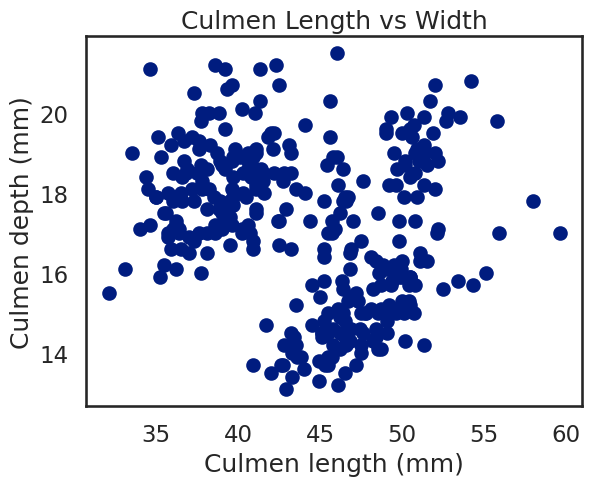

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

ax = plt.axes()

ax.scatter(df.culmen_length_mm, df.culmen_depth_mm)


ax.set(xlabel='Culmen length (mm)',
       ylabel='Culmen depth (mm)',
       title='Culmen Length vs Width');

Analyzation: There is 3 clusters of Culmen proportions of penguins. This suggests that there is 3 common range of proportions of culmen of the penguins. The biggest cluster is around 16 mm to 20 mm culmen depth and 35 mm - 44 mm culmen length. While the smallest cluseter is around 18 mm to 20 mm of culmen depth and 50 mm to 54 mm culmen length.

### Histogram

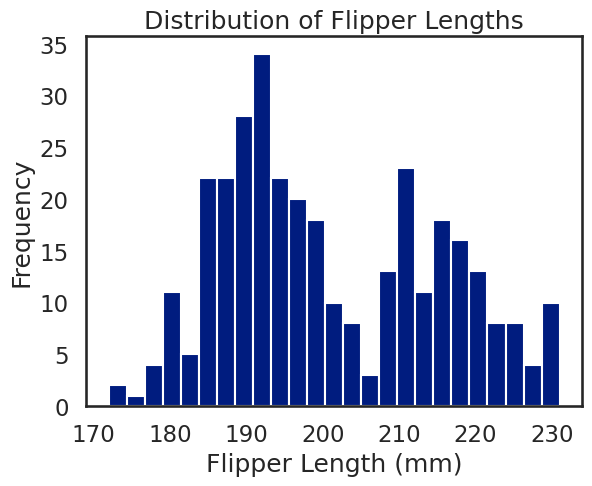

In [ ]:
#histogram
ax = plt.axes()
ax.hist(df.flipper_length_mm, bins=25);

ax.set(xlabel='Flipper Length (mm)',
       ylabel='Frequency',
       title='Distribution of Flipper Lengths');

Analyzation: This Histogram shows that the most common flipper lenth is around 190 mm. The most common distribution of frequency is estimatedly in the range 185 mm to 198 mm. The least common length of flipper is around 175 mm.

### Boxplot

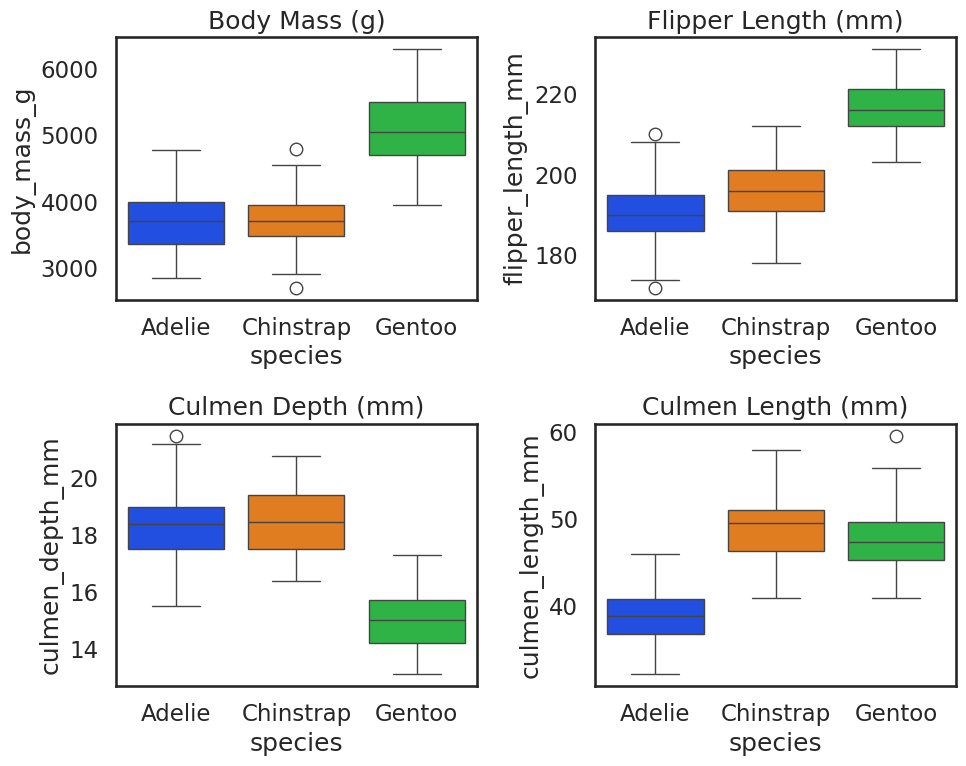

In [ ]:
'''
seperated each boxplot to have their own y scale because body mass has higher
number scaling compared to other features making other boxplots completely flat
and unreadable
'''

fig, axes = plt.subplots(2, 2, figsize=(10, 8))

sns.set_palette('bright')

# body_mass_g
sns.boxplot(x='species', y='body_mass_g',hue = 'species', data=df, ax=axes[0, 0])
axes[0, 0].set_title('Body Mass (g)')
axes[0, 0].tick_params(axis='x')

#flipper_length_mm
sns.boxplot(x='species', y='flipper_length_mm',hue = 'species',  data=df, ax=axes[0, 1])
axes[0, 1].set_title('Flipper Length (mm)')
axes[0, 1].tick_params(axis='x')

#culmen_depth_mm
sns.boxplot(x='species', y='culmen_depth_mm',hue = 'species',  data=df, ax=axes[1, 0])
axes[1, 0].set_title('Culmen Depth (mm)')
axes[1, 0].tick_params(axis='x')

#culmen_length_mm
sns.boxplot(x='species', y='culmen_length_mm',hue = 'species',  data=df, ax=axes[1, 1])
axes[1, 1].set_title('Culmen Length (mm)')
axes[1, 1].tick_params(axis='x')

plt.tight_layout()
plt.show()

Analyzation: This Boxplot shows that the spread of data of Adelie and Chinstrap are similar in their body mass, cullmen depth, and flipper length. However, Chinstrap and Gentoo have similar spread of data in the culmen length. This boxplot suggests that Adelie and Chinstrap species are more similar to one another.

### Pairplot

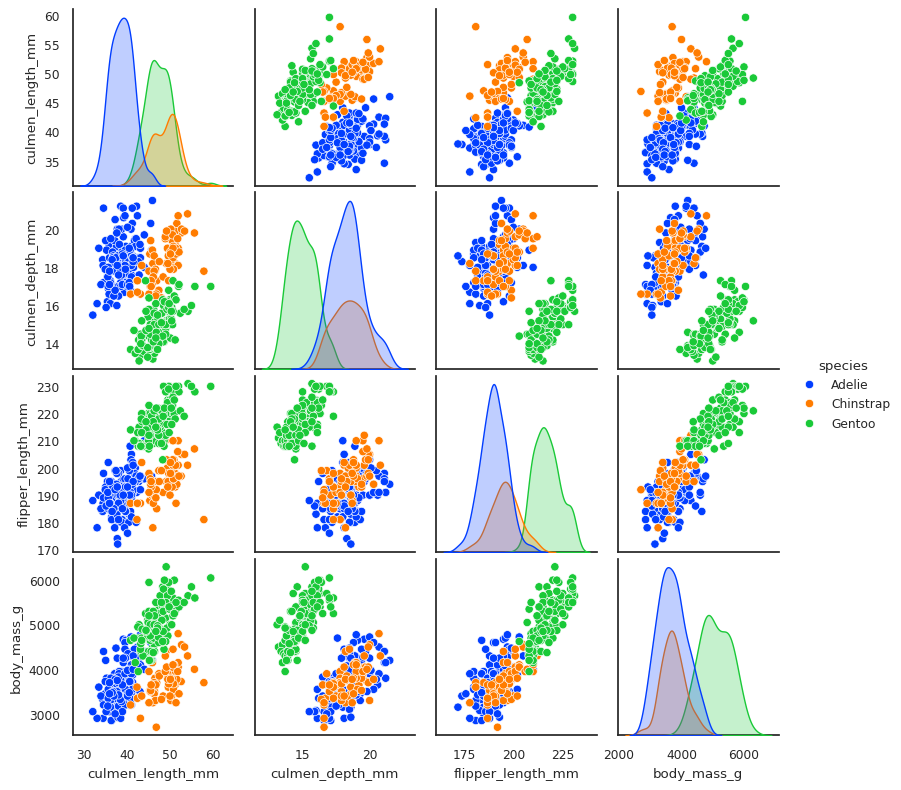

In [ ]:
#pair plot
sns.set_context("notebook", font_scale=0.8)
sns.set_palette("bright")
sns.pairplot(df, hue='species', height=2, aspect=1)

Analyzation: The pairplot indicates that the proportions of Adelie and Chinstrap have similar proportions in terms of their proportion of body mass to culmen depth and flipper length. The cluster of both Adelie and Chinstrap specie is also notable in the proportion of flipper length to culmen depth. Overall, Gentoo has distinct proportions compared to Adelie and Chinstrap because Gento's proportions are commonly isolated from Adelie and Chinstrap.



---



# **Conclusion:**

In this lab activity, the student aims to use different toolsets for machine learning. This lab activity reviews the students knowledge of pandas and numpy to do data visualizations and data analyzations.

In the procedures, the students are walk-throughed the process of data analyzation thrugh data visualizations of the iris dataset. The student created scatterplots, boxplots, and pairplots to see the tendencies of each iris species proportions. Based on the results of the data visualization, the Setosa specie has the most distinct proportions compared to Virginica and Versicolor.

In the supplementary activity, I used a dataset of penguins about 3 different species with their proportions of culmen length, culmen depth, etc. Before doing data visualizations, I cleaned the dataset by deleting unnecessary columns for the classification and dropping 10 rows because of their invalid inputs. I used the same data visualizations used in the supplementary activity to interpret the dataset. The findings according to the visualizations is that Gentoo penguins have the most unique proportions compared to Adelie and Chinstrap.

Overall, this lab activity has helped me to familiarize on how machine learning works. I can conclude that machine learning uses patterns based on statistics to do predictions the same way we analyze the data visualizations we created.